<a href="https://colab.research.google.com/github/Rizkyepk/Data-Science/blob/main/Lacture6/Hands_on_Data_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Mounting google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd

# Load data into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset_ML/covid_19_indonesia_time_series_all.csv')

# Menampilkan baris pertama dari dataset
df.head(10)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.00,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,174.42%,1.0,1.0
5,3/3/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,0.0,1.0
6,3/3/2020,ID-JB,Jawa Barat,1,1,0,0,1,1,60,...,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,6000.00%,NaN,NaN
7,3/3/2020,ID-RI,Riau,0,0,0,0,1,0,1,...,0.511648,0.00,0.16,0.00,0.00,0.00,0.00%,100.00%,0.0,1.0
8,3/4/2020,ID-JK,DKI Jakarta,2,0,0,2,45,20,75,...,-6.204699,0.18,4.15,0.00,1.84,0.18,44.44%,166.67%,1.0,1.0
9,3/4/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.0,1.0


# EDA

In [46]:
# Informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [47]:
# Statistik deskriptif untuk kolom numerik
df.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


In [48]:
# Melihat jumlah missing values di setiap kolom
df.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

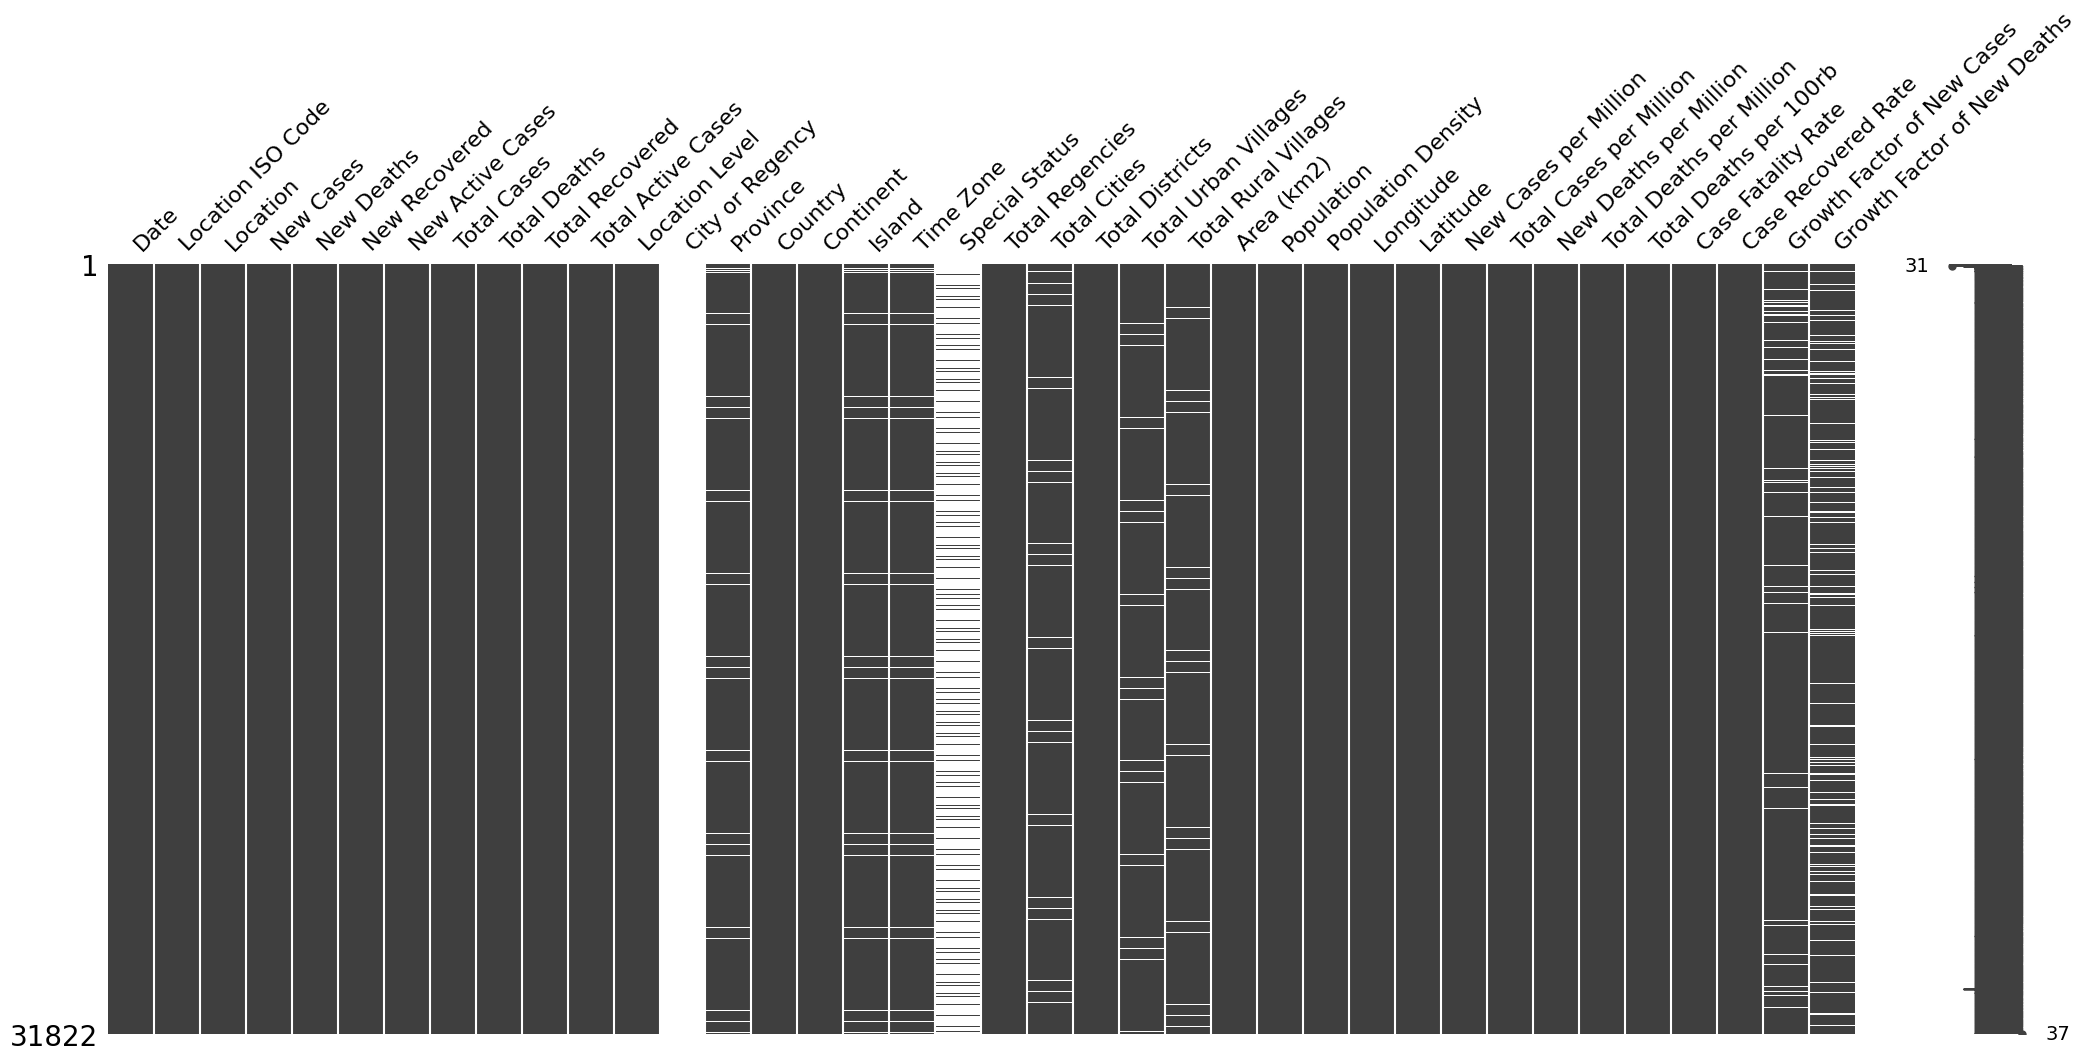

In [49]:
import missingno as msno
import matplotlib.pyplot as plt

# Membuat visualisasi matriks missing values
msno.matrix(df)

# Menampilkan
plt.show()

Distribusi Kasus Baru

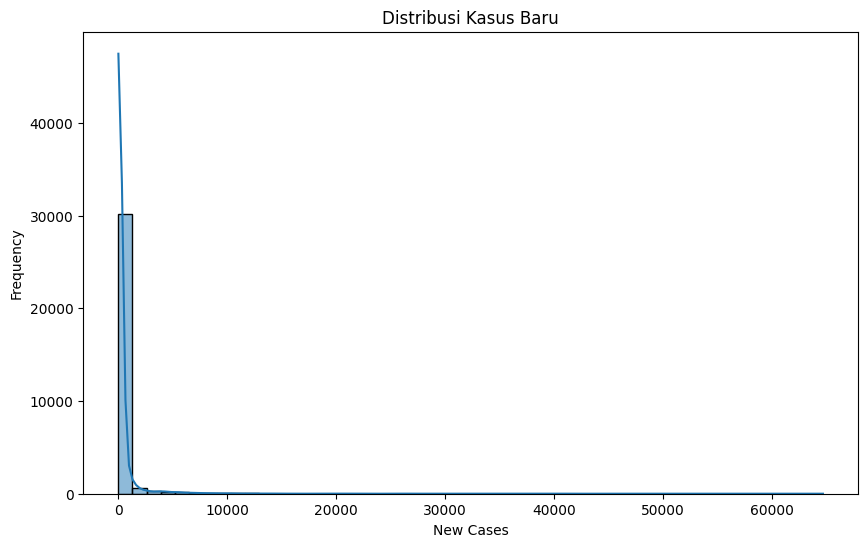

In [50]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['New Cases'], bins=50, kde=True)
plt.title('Distribusi Kasus Baru')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.show()

Tren Kasus Baru
python

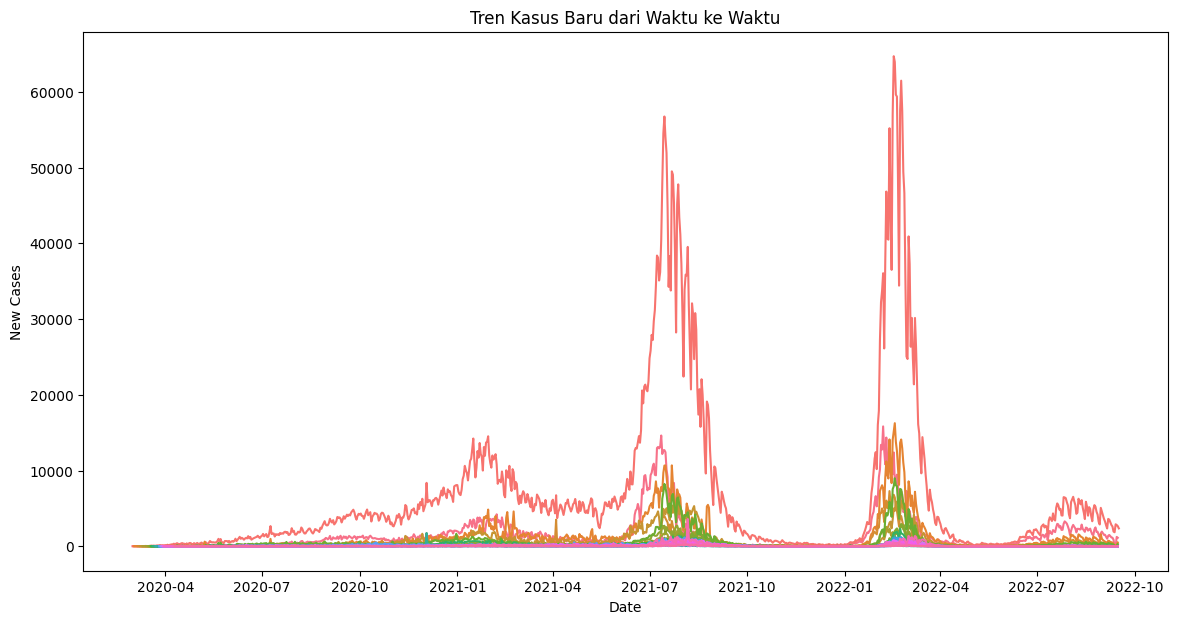

In [51]:
# Mengonversi kolom 'Date' menjadi tipe datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot tren kasus baru dari waktu ke waktu
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='Date', y='New Cases', hue='Location', legend=False)
plt.title('Tren Kasus Baru dari Waktu ke Waktu')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

Top Locations by Total Cases

In [52]:
top_locations = df.groupby('Location')['Total Cases'].max().sort_values(ascending=False).head(10)
print(top_locations)

Location
Indonesia                     6405044
DKI Jakarta                   1412511
Jawa Barat                    1173731
Jawa Tengah                    636409
Jawa Timur                     601545
Banten                         333875
Daerah Istimewa Yogyakarta     224307
Kalimantan Timur               209017
Bali                           166831
Sumatera Utara                 158866
Name: Total Cases, dtype: int64


Growth Factor

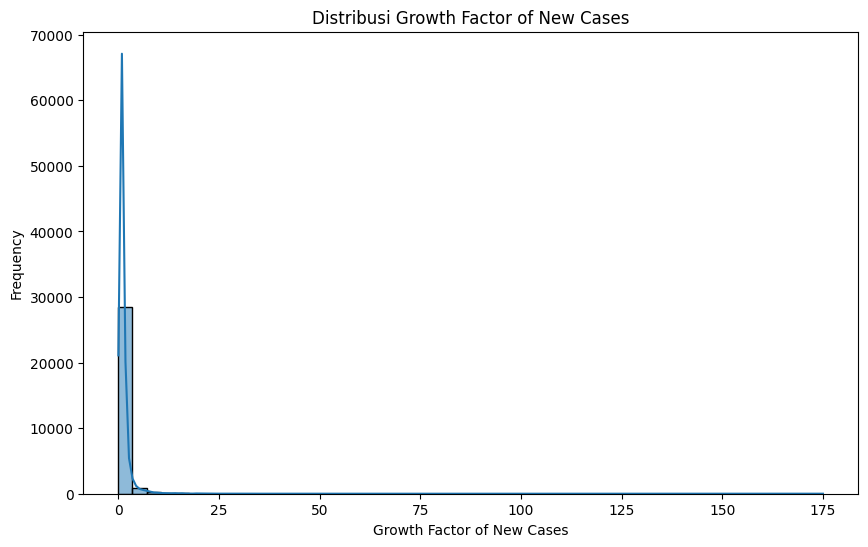

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(df['Growth Factor of New Cases'].dropna(), bins=50, kde=True)
plt.title('Distribusi Growth Factor of New Cases')
plt.xlabel('Growth Factor of New Cases')
plt.ylabel('Frequency')
plt.show()

Case Fatality Rate and Recovery Rate

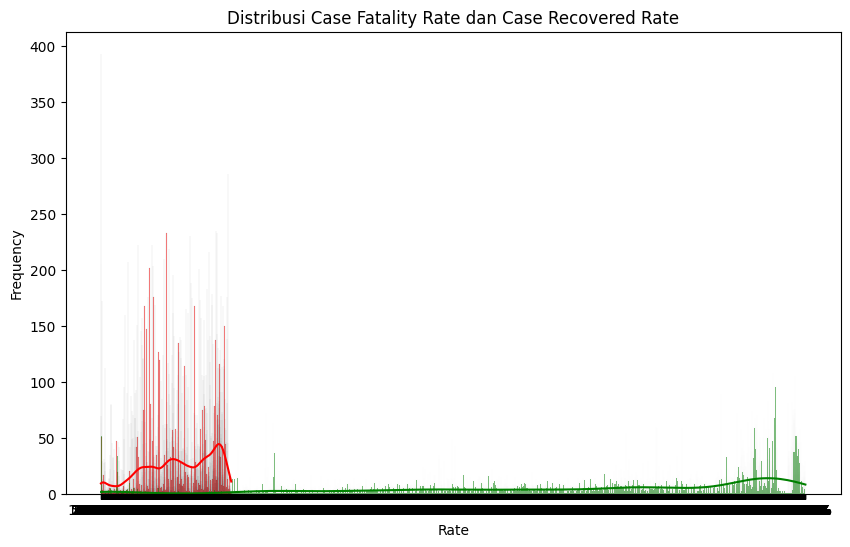

In [54]:
plt.figure(figsize=(10,6))
sns.histplot(df['Case Fatality Rate'].dropna(), bins=50, kde=True, color='red')
sns.histplot(df['Case Recovered Rate'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribusi Case Fatality Rate dan Case Recovered Rate')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

# Cleansing

In [55]:
# Konversi kolom 'Date' ke tipe datetime
df['Date'] = pd.to_datetime(df['Date'])

In [56]:
# Drop kolom yang tidak diperlukan
columns_to_drop = ['Location ISO Code', 'City or Regency', 'Time Zone',
                   'Total Urban Villages', 'Total Rural Villages', 'Area (km2)',
                   'Longitude', 'Latitude', 'New Cases per Million',
                   'Total Cases per Million', 'New Deaths per Million',
                   'Total Deaths per Million', 'Total Deaths per 100rb',
                   'Location Level', 'Special Status']

df_cleaned = df.drop(columns=columns_to_drop)

# Tampilkan beberapa baris teratas dari data yang telah dibersihkan
df_cleaned.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Island,Total Regencies,Total Cities,Total Districts,Population,Population Density,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,75,-56,...,Jawa,1,5.0,44,10846145,16334.31,51.28%,192.31%,NaN,NaN
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,75,-54,...,Jawa,1,5.0,44,10846145,16334.31,48.78%,182.93%,1.0,1.0
2,2020-03-02,Indonesia,2,0,0,2,2,0,0,2,...,NaN,416,98.0,7230,265185520,138.34,0.00%,0.00%,NaN,NaN
3,2020-03-02,Riau,1,0,0,1,1,0,1,0,...,Sumatera,10,2.0,169,6074100,69.80,0.00%,100.00%,NaN,NaN
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,75,-52,...,Jawa,1,5.0,44,10846145,16334.31,46.51%,174.42%,1.0,1.0


In [57]:
# List nama kolom yang ingin diubah tipe datanya
numeric_columns = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases',
                   'Total Cases', 'Total Deaths', 'Total Recovered',
                   'Total Active Cases', 'Total Regencies', 'Total Cities',
                   'Total Districts', 'Population']

# Loop melalui setiap kolom dan ubah tipe datanya menjadi numerik
for column in numeric_columns:
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')

# Tampilkan informasi data setelah perubahan
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location                     31822 non-null  object        
 2   New Cases                    31822 non-null  int64         
 3   New Deaths                   31822 non-null  int64         
 4   New Recovered                31822 non-null  int64         
 5   New Active Cases             31822 non-null  int64         
 6   Total Cases                  31822 non-null  int64         
 7   Total Deaths                 31822 non-null  int64         
 8   Total Recovered              31822 non-null  int64         
 9   Total Active Cases           31822 non-null  int64         
 10  Province                     30893 non-null  object        
 11  Country                      31822 non-nu

In [63]:
# Menghapus baris dengan nilai NaN
df_cleaned = df_cleaned.dropna()

In [64]:
df_cleaned.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Total Regencies,Total Cities,Total Districts,Population,Population Density,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Category
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,75,-54,...,1,5.0,44,10846145,16334.31,48.78%,182.93%,1.0,1.0,Kuning
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,75,-52,...,1,5.0,44,10846145,16334.31,46.51%,174.42%,1.0,1.0,Kuning
7,2020-03-03,Riau,0,0,0,0,1,0,1,0,...,10,2.0,169,6074100,69.80,0.00%,100.00%,0.0,1.0,Hijau
8,2020-03-04,DKI Jakarta,2,0,0,2,45,20,75,-50,...,1,5.0,44,10846145,16334.31,44.44%,166.67%,1.0,1.0,Kuning
10,2020-03-04,Jawa Barat,1,0,0,1,2,1,60,-59,...,18,9.0,627,45161325,1276.55,50.00%,3000.00%,1.0,0.0,Hijau


# Processing


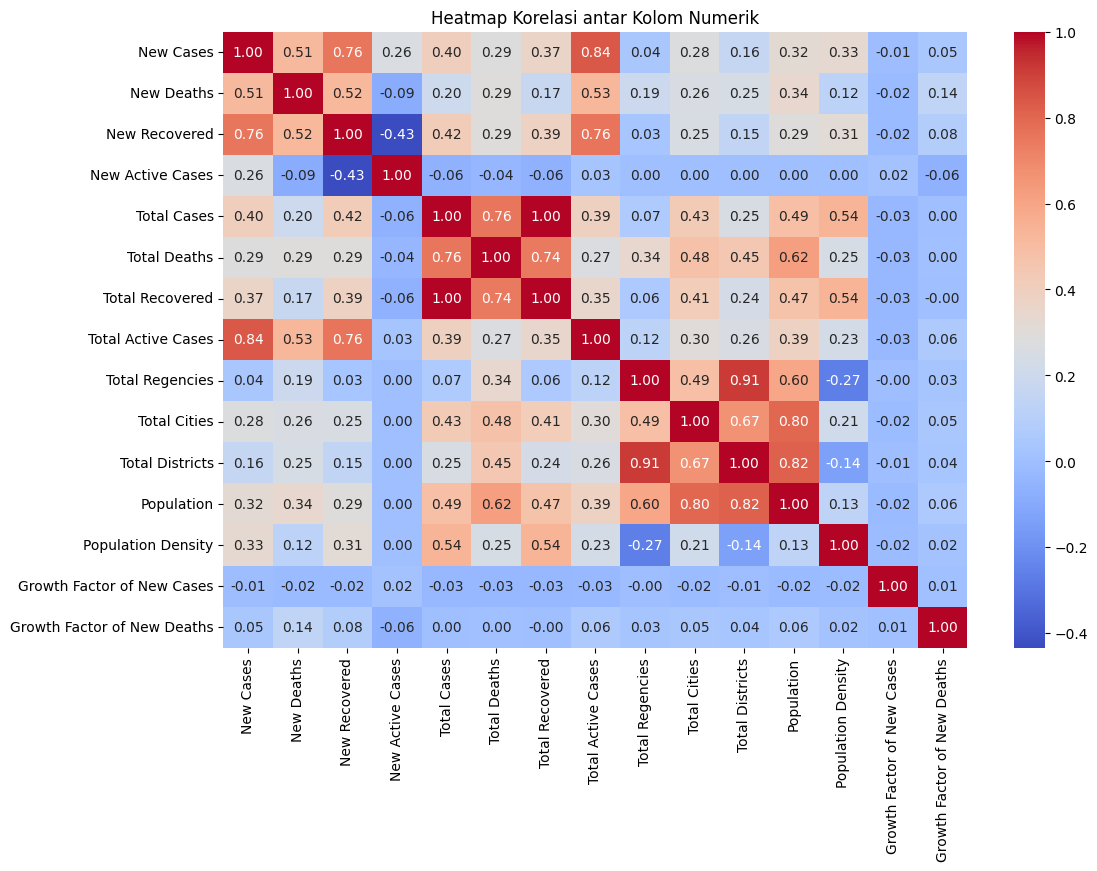

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi antar kolom numerik
numeric_data = df_cleaned.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Kolom Numerik')
plt.show()


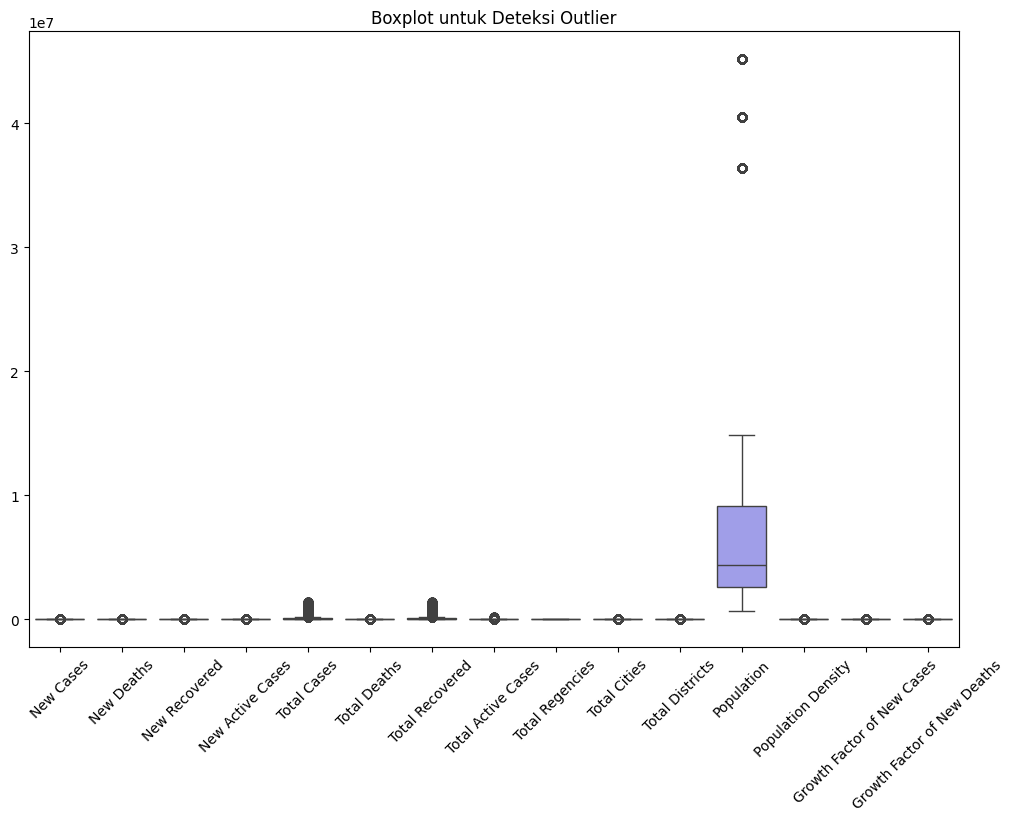

In [66]:
# Memilih kolom-kolom numerik
numeric_data = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_data)
plt.title('Boxplot untuk Deteksi Outlier')
plt.xticks(rotation=45)  # Putar label sumbu x agar lebih mudah dibaca
plt.show()

binning

In [68]:
# Tentukan batas-batas kategori
bins = [0, 10, 100, float('inf')]  # Misalnya, bin pertama untuk jumlah kasus rendah (<1000), kedua untuk jumlah kasus sedang (1000-5000), dan ketiga untuk jumlah kasus tinggi (>5000)
labels = ['Hijau', 'Kuning', 'Merah']  # Kategori warna sesuai dengan jumlah kasus

# Tambahkan kolom baru 'Color Category' berdasarkan binning
df_cleaned['Category'] = pd.cut(df_cleaned['Total Cases'], bins=bins, labels=labels, right=False)

# Tampilkan beberapa baris data untuk memastikan bahwa kolom baru telah ditambahkan
df_cleaned.head()


,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Total Regencies,Total Cities,Total Districts,Population,Population Density,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Category
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,75,-54,...,1,5.0,44,10846145,16334.31,48.78%,182.93%,1.0,1.0,Kuning
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,75,-52,...,1,5.0,44,10846145,16334.31,46.51%,174.42%,1.0,1.0,Kuning
7,2020-03-03,Riau,0,0,0,0,1,0,1,0,...,10,2.0,169,6074100,69.80,0.00%,100.00%,0.0,1.0,Hijau
8,2020-03-04,DKI Jakarta,2,0,0,2,45,20,75,-50,...,1,5.0,44,10846145,16334.31,44.44%,166.67%,1.0,1.0,Kuning
10,2020-03-04,Jawa Barat,1,0,0,1,2,1,60,-59,...,18,9.0,627,45161325,1276.55,50.00%,3000.00%,1.0,0.0,Hijau


scaling

In [71]:
from sklearn.preprocessing import Normalizer

# Membuat objek Normalizer
normalizer = Normalizer()

# Memilih kolom-kolom numerik untuk dilakukan normalisasi
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Melakukan normalisasi pada data numerik
df_normalized = df_cleaned.copy()  # Duplikat DataFrame untuk menjaga data asli
df_normalized[numeric_columns] = normalizer.fit_transform(df_cleaned[numeric_columns])

# Tampilkan beberapa baris data teratas setelah normalisasi
df_normalized.head()


,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Total Regencies,Total Cities,Total Districts,Population,Population Density,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Category
1,2020-03-02,DKI Jakarta,0.000095,0.0,0.0,0.467636,2.193020e-05,0.000462,4.190156e-05,0.009282,...,0.000000,0.387208,0.000000,0.177416,0.774416,48.78%,182.93%,0.008418,0.005758,Kuning
4,2020-03-03,DKI Jakarta,0.000095,0.0,0.0,0.467636,2.302671e-05,0.000462,4.190156e-05,0.009290,...,0.000000,0.387208,0.000000,0.177416,0.774416,46.51%,174.42%,0.008418,0.005758,Kuning
7,2020-03-03,Riau,0.000000,0.0,0.0,0.822444,0.000000e+00,0.000000,9.826760e-07,0.016711,...,0.437824,0.170265,0.273738,0.166029,0.005107,0.00%,100.00%,0.000000,0.010127,Hijau
8,2020-03-04,DKI Jakarta,0.000095,0.0,0.0,0.467636,2.412322e-05,0.000462,4.190156e-05,0.009298,...,0.000000,0.387208,0.000000,0.177416,0.774416,44.44%,166.67%,0.008418,0.005758,Kuning
10,2020-03-04,Jawa Barat,0.000032,0.0,0.0,0.317450,3.721955e-07,0.000016,2.275667e-05,0.006287,...,0.319193,0.525730,0.492766,0.525730,0.040832,50.00%,3000.00%,0.005714,0.000000,Hijau
